In [2]:
import numpy as np
import os, sys, math
import matplotlib.pyplot as plt
import imageio.v3 as iio


In [3]:
dateset_directory = "dataset"

x = iio.imread("dataset/4/img_66.jpg")
x.shape, x.max(), x.min()

((28, 28), np.uint8(255), np.uint8(0))

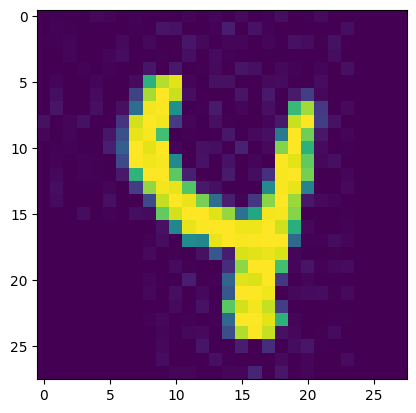

In [4]:
plt.imshow(x)

In [5]:
images = []
one_hot_labels = []
numerical_labels = []

for num in range(10):
	folder_path = os.path.join(dateset_directory, str(num))
	
	for image in os.listdir(folder_path):
		image_path = os.path.join(folder_path, image)

		numerical_labels.append(num)
		one_hot = np.zeros((10, ))
		one_hot[num] = 1
		one_hot_labels.append(one_hot)

		image_arr = iio.imread(image_path)
		images.append(image_arr)


		

(<matplotlib.image.AxesImage at 0x72ce19f9aa10>,
 2,
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]))

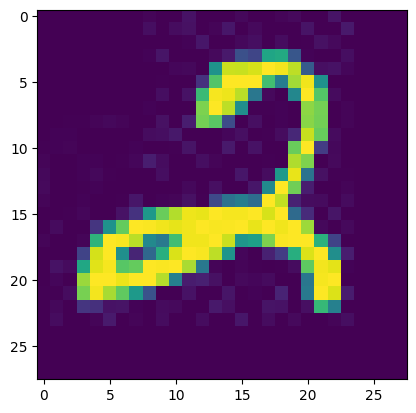

In [6]:
plt.imshow(images[11000]), numerical_labels[11000], one_hot_labels[11000]

In [7]:
norm_images = []
for image in images:
	norm_images.append(image.flatten().astype(np.float32) / 255.0)

In [8]:
norm_images[12].max(), norm_images[12].min()

(np.float32(1.0), np.float32(0.0))

In [9]:
from sklearn.model_selection import train_test_split
image_train, image_test, one_hot_train, one_hot_test = train_test_split(norm_images, one_hot_labels, shuffle=True, stratify=numerical_labels, random_state=22, train_size=0.7)
one_hot_test = np.array(one_hot_test)
one_hot_train = np.array(one_hot_train)
image_train = np.array(image_train)
image_test = np.array(image_test)

In [ ]:
import nn
import importlib
importlib.reload(nn)

n = nn.NeuralNetwork([28*28, 128, 10])
n.train_sgd(image_train, one_hot_train, image_test, one_hot_test)